In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Exploratory Data Analysis and preprocessing

In [4]:
# loading the data from csv file to Pandas DataFrame
data = pd.read_csv('salarydata.csv')

In [5]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
data.shape

(32561, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [8]:
data[data == '?'] = np.nan


In [9]:
data.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [10]:
#filling of missing values created by using mode

In [11]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [12]:
for col in ['workclass', 'occupation', 'native-country']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [13]:
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [14]:
#data.duplicated().sum()

In [15]:
#data.drop_duplicates(keep=False, inplace=True)

In [16]:
#data.duplicated().sum()

# Data Visualization

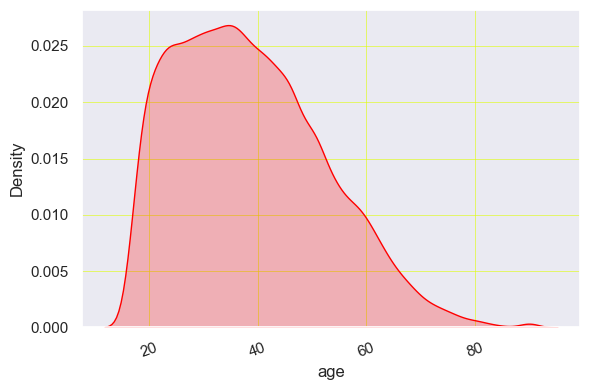

In [17]:
plt.figure(figsize=(6,4))
sns.set_theme(style="darkgrid")
plt.grid(True)
ax=sns.kdeplot(data["age"],shade=True,color="red")
ax.grid(which='major', axis='x', zorder=0, color='#DFFF00', linewidth=0.4)
ax.grid(which='major', axis='y', zorder=0, color='#DFFF00', linewidth=0.4)
plt.rc('font', size=10,weight="bold")
plt.xticks(rotation=20)
plt.tight_layout()

In [18]:
#data1=data

In [19]:
#data1['salary']=data['salary'].apply(lambda x:1 if x== '>50K' else 0)

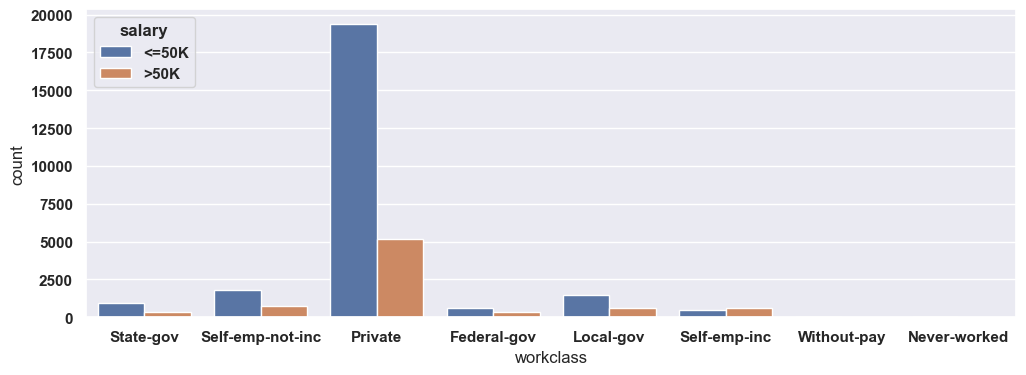

In [20]:
plt.figure(figsize=(12,4))
sns.countplot(x='workclass', hue='salary', data=data)
plt.show()

1. In every  sector the salary of majority is less than 50k except Self-emp-inc workclass .In the private sector the employees having the salary above 50k and below 50k have more gap .There is some working class with is unknown we can drop that rows later on .

In [21]:
data['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

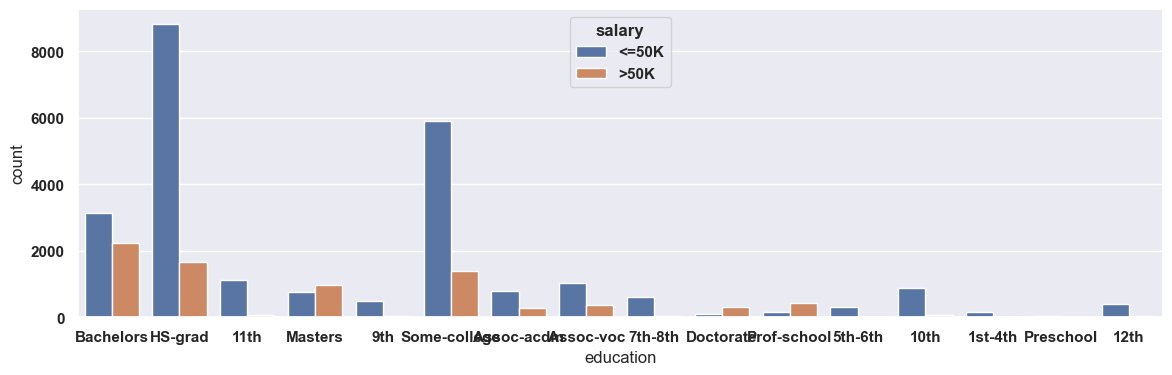

In [22]:
plt.figure(figsize=(14,4))
sns.countplot(x='education', hue='salary', data=data)
plt.show()

On analysing the data,we get the below findings 

1.Majority of those who completed the masters,Doctrate ,Pro-school have a salary greater than 50k .

In [23]:
data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

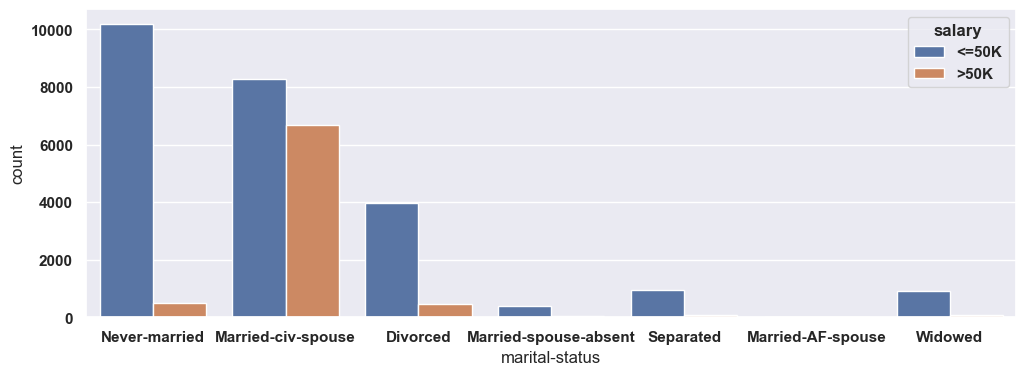

In [24]:
plt.figure(figsize=(12,4))
sns.countplot(x='marital-status', hue='salary', data=data)
plt.show()

In [25]:
data['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

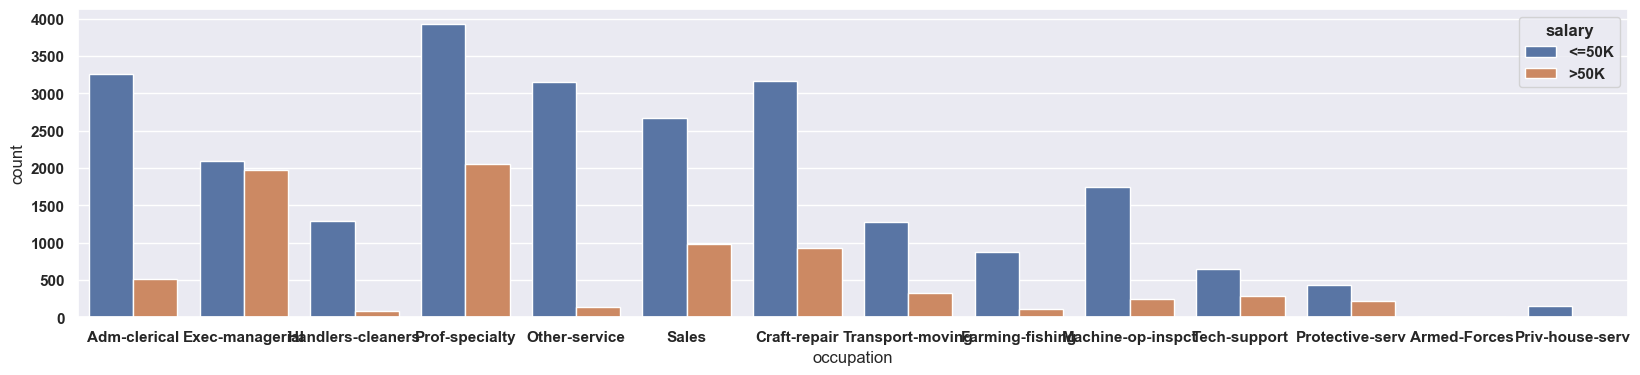

In [26]:
plt.figure(figsize=(20,4))
sns.countplot(x='occupation', hue='salary', data=data)
plt.show()

In [27]:
data['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

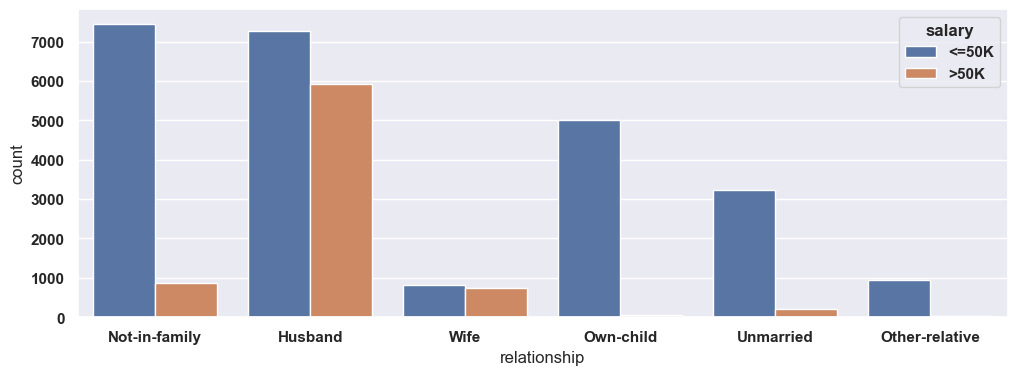

In [28]:
plt.figure(figsize=(12,4))
sns.countplot(x='relationship', hue='salary', data=data)
plt.show()

In [29]:
data['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

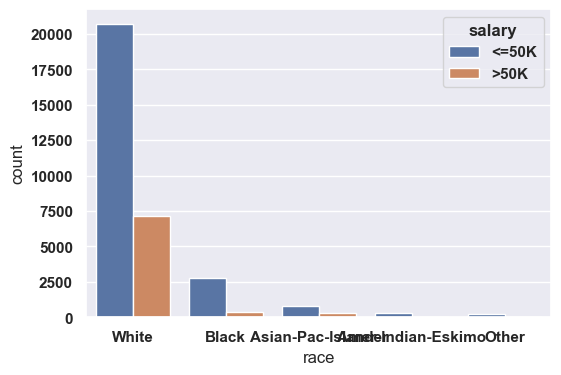

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='race', hue='salary', data=data)
plt.show()

In [31]:
data['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

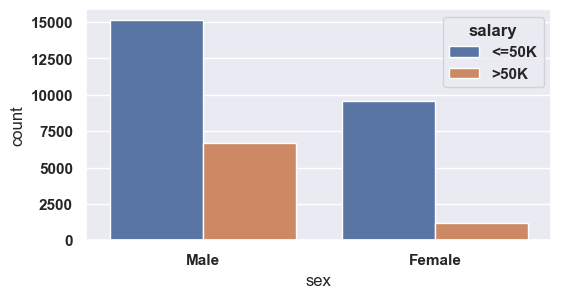

In [32]:
plt.figure(figsize=(6,3))
sns.countplot(x='sex', hue='salary', data=data)
plt.show()

In [33]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

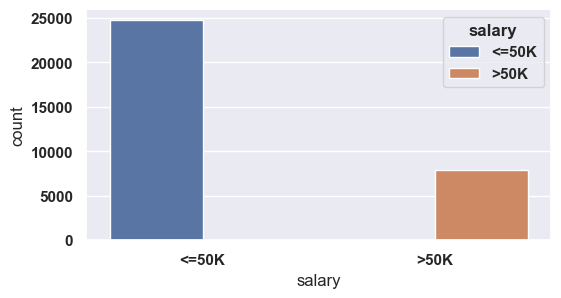

In [34]:
plt.figure(figsize=(6,3))
sns.countplot(x='salary', hue='salary', data=data)
plt.show()

<AxesSubplot:>

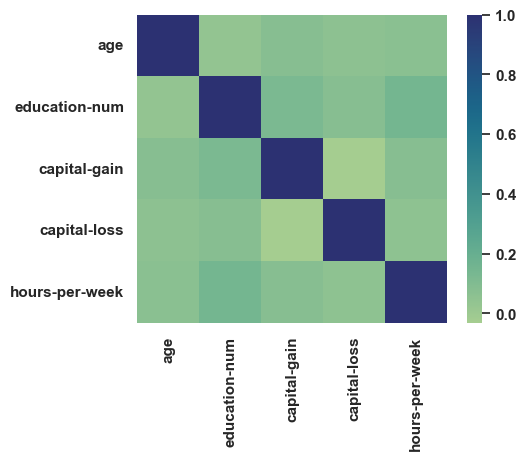

In [35]:
corr=data.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr,cmap='crest')

In [36]:
data['native-country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [37]:
ccol=data.select_dtypes(include=["object"]).columns
ncol=data.select_dtypes(include=["int","float"]).columns

In [38]:
ccol

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [39]:
ncol

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [40]:
data['capital-gain'].nunique()

119

In [41]:
data['hours-per-week'].nunique()

94

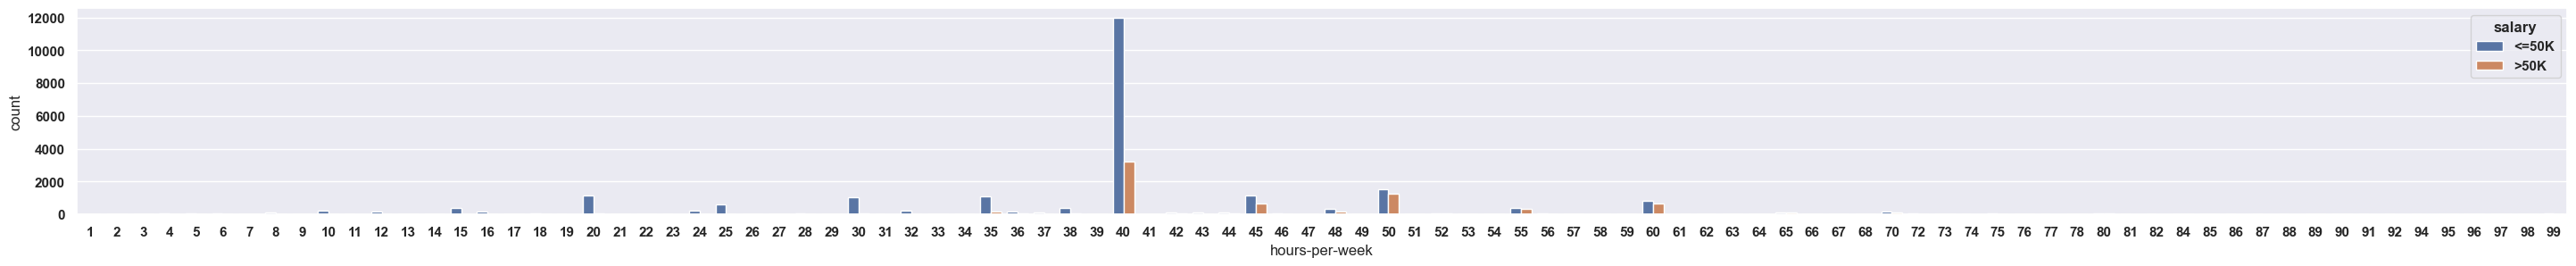

In [42]:
plt.figure(figsize=(36,3))
sns.countplot(x='hours-per-week', hue='salary', data=data)
plt.show()

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()
data["workclass"] = le.fit_transform(data["workclass"])
data["education"] = le.fit_transform(data["education"])
data["marital-status"] = le.fit_transform(data["marital-status"])
data["occupation"] = le.fit_transform(data["occupation"])
data["relationship"] = le.fit_transform(data["relationship"])
data["race"] = le.fit_transform(data["race"])
data["sex"] = le.fit_transform(data["sex"])
data["native-country"] = le.fit_transform(data["native-country"])



In [45]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,5,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,3,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,3,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,3,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,7,12,2,12,5,4,0,0,0,38,38,<=50K
32557,40,3,11,9,2,6,0,4,1,0,0,40,38,>50K
32558,58,3,11,9,6,0,4,4,0,0,0,40,38,<=50K
32559,22,3,11,9,4,0,3,4,1,0,0,20,38,<=50K


In [46]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [47]:
data1=data.drop(['race','native-country','age','education-num'],axis=1)

In [48]:
data1

,workclass,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,salary
0,6,9,4,0,1,1,2174,0,40,<=50K
1,5,9,2,3,0,1,0,0,13,<=50K
2,3,11,0,5,1,1,0,0,40,<=50K
3,3,1,2,5,0,1,0,0,40,<=50K
4,3,9,2,9,5,0,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,3,7,2,12,5,0,0,0,38,<=50K
32557,3,11,2,6,0,1,0,0,40,>50K
32558,3,11,6,0,4,0,0,0,40,<=50K
32559,3,11,4,0,3,1,0,0,20,<=50K


In [49]:
X=data1.drop('salary',axis=1)
y=data1['salary']

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
X

,workclass,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week
0,6,9,4,0,1,1,2174,0,40
1,5,9,2,3,0,1,0,0,13
2,3,11,0,5,1,1,0,0,40
3,3,1,2,5,0,1,0,0,40
4,3,9,2,9,5,0,0,0,40
...,...,...,...,...,...,...,...,...,...
32556,3,7,2,12,5,0,0,0,38
32557,3,11,2,6,0,1,0,0,40
32558,3,11,6,0,4,0,0,0,40
32559,3,11,4,0,3,1,0,0,20


In [52]:
X1=X.drop(['capital-gain','capital-loss', 'hours-per-week'],axis=1)

In [53]:
X2=X[['capital-gain','capital-loss', 'hours-per-week']]

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
ss=StandardScaler()
X2=ss.fit_transform(X2)
X2=pd.DataFrame(X2,columns=['capital-gain','capital-loss', 'hours-per-week'])
X2.head()

,capital-gain,capital-loss,hours-per-week
0,0.148453,-0.21666,-0.035429
1,-0.145920,-0.21666,-2.222153
2,-0.145920,-0.21666,-0.035429
3,-0.145920,-0.21666,-0.035429
4,-0.145920,-0.21666,-0.035429


In [56]:
X2

,capital-gain,capital-loss,hours-per-week
0,0.148453,-0.21666,-0.035429
1,-0.145920,-0.21666,-2.222153
2,-0.145920,-0.21666,-0.035429
3,-0.145920,-0.21666,-0.035429
4,-0.145920,-0.21666,-0.035429
...,...,...,...
32556,-0.145920,-0.21666,-0.197409
32557,-0.145920,-0.21666,-0.035429
32558,-0.145920,-0.21666,-0.035429
32559,-0.145920,-0.21666,-1.655225


In [57]:
X1

,workclass,education,marital-status,occupation,relationship,sex
0,6,9,4,0,1,1
1,5,9,2,3,0,1
2,3,11,0,5,1,1
3,3,1,2,5,0,1
4,3,9,2,9,5,0
...,...,...,...,...,...,...
32556,3,7,2,12,5,0
32557,3,11,2,6,0,1
32558,3,11,6,0,4,0
32559,3,11,4,0,3,1


In [58]:
frame1=[X1,X2]
X3=pd.concat(frame1,axis=1)

In [59]:
X3

,workclass,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week
0,6,9,4,0,1,1,0.148453,-0.21666,-0.035429
1,5,9,2,3,0,1,-0.145920,-0.21666,-2.222153
2,3,11,0,5,1,1,-0.145920,-0.21666,-0.035429
3,3,1,2,5,0,1,-0.145920,-0.21666,-0.035429
4,3,9,2,9,5,0,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...,...,...,...
32556,3,7,2,12,5,0,-0.145920,-0.21666,-0.197409
32557,3,11,2,6,0,1,-0.145920,-0.21666,-0.035429
32558,3,11,6,0,4,0,-0.145920,-0.21666,-0.035429
32559,3,11,4,0,3,1,-0.145920,-0.21666,-1.655225
